**FAKE NEWS PREDICTION**







In [1]:
# Importing pandas and numpy library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading dataset
df_false=pd.read_csv("Fake.csv")
df_true=pd.read_csv("True.csv")

In [5]:
# Add target to track fake and real 
df_false["target"]=0
df_true["target"]=1

In [6]:
df_true.shape

(21417, 5)

In [7]:
df_false.shape

(23481, 5)

In [8]:
df_false.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
df_true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
# Concatenate dataframes
df=pd.concat([df_true[['text','target']],df_false[['text','target']]])

In [11]:
df.head()

,text,target
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [12]:
df.tail()

,text,target
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0
23480,21st Century Wire says As 21WIRE predicted in ...,0


In [13]:
# Checking for null values
df.isnull().sum()

text      0
target    0
dtype: int64

In [14]:
# Shuffle and resampling of data
df = df.sample(frac = 1)
df.head()

,text,target
13095,BAGHDAD (Reuters) - Iraqi federal and Kurdish ...,1
16612,You just can t make this stuff up we have a Na...,0
17409,Whatever happened to innocent until proven gui...,0
16828,MADRID (Reuters) - Spanish Prime Minister Mari...,1
19743,MOSCOW (Reuters) - Russia and China agreed tha...,1


Data Cleaning And Preprocessing

In [15]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
ps = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stopwords = stopwords.words('english')

In [18]:
def cleaning_data(row):
    
    # convert text to into lower case
    row = row.lower() 
    
    # this line of code only take words from text and remove number and special character using RegX
    row = re.sub('[^a-zA-Z]' , ' ' , row)
    
    # split the data and make token.
    token = row.split() 
    
    # lemmatize the word and remove stop words like a, an , the , is ,are ...
    news = [ps.lemmatize(word) for word in token if not word in stopwords]  
    
    # finaly join all the token with space
    cleanned_news = ' '.join(news) 
    
    # return cleanned data
    return cleanned_news 

In [19]:
# Cleaning the text data 
df['text'] = df['text'].apply(lambda x : cleaning_data(x))


EXploratory Data Analysis

In [20]:
# Concatenation of datasets
data=pd.concat([df_false ,df_true])

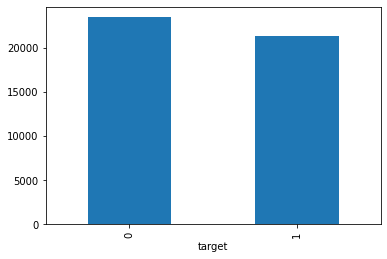

In [21]:
# How many fake and real articles
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


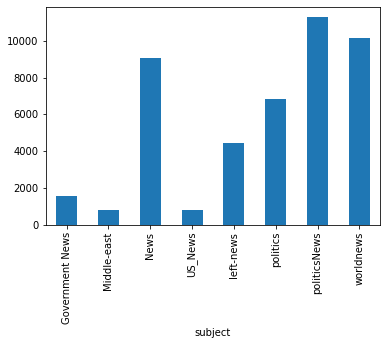

In [22]:
# How many articles per subject
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [23]:
data['text'] = data['text'].apply(lambda x : cleaning_data(x))

In [24]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
import nltk
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

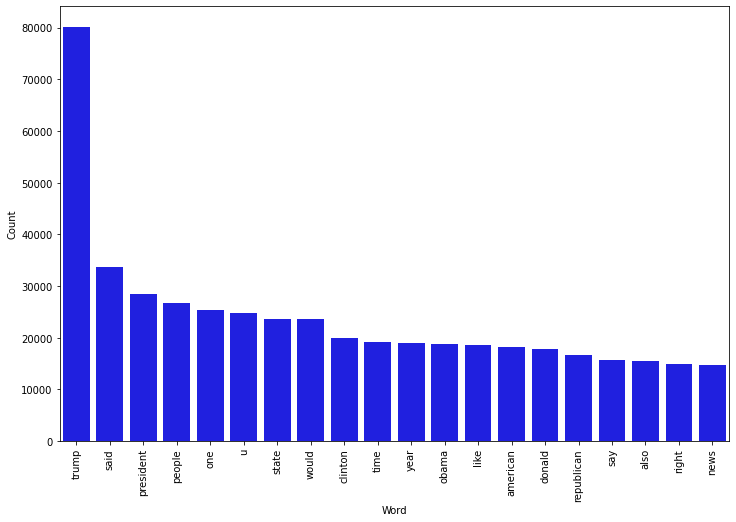

In [25]:
# Most frequent words in fake news
counter(data[data["target"] == 0], "text", 20)

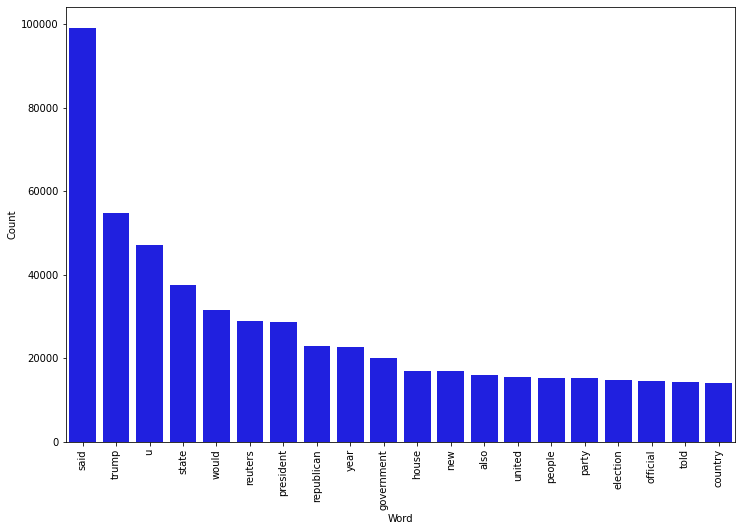

In [26]:
# Most frequent words in real news
counter(data[data["target"] == 1], "text", 20)

In [27]:
# Considering target in Y and attributes in x
X = df.iloc[:25000,0]
Y = df.iloc[:25000,1]

Prepraing the data

In [28]:
# Split the data as test and training set
from sklearn.model_selection import train_test_split
X_train , X_test ,Y_train,Y_test= train_test_split(X , Y , test_size = 0.3,random_state = 0)


Vectorizing and applying TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 50000 , lowercase=False , ngram_range=(1,2))

In [30]:
vec_train_data = vectorizer.fit_transform(X_train)
vec_train_data = vec_train_data.toarray()

In [31]:
vec_test_data = vectorizer.transform(X_test).toarray()

In [32]:
vec_train_data.shape 

(17500, 50000)

In [33]:
vec_test_data.shape

(7500, 50000)

In [34]:
Y_train.value_counts()

0    9155
1    8345
Name: target, dtype: int64

In [35]:
Y_test.value_counts()

0    3972
1    3528
Name: target, dtype: int64

In [36]:
training_data = pd.DataFrame(vec_train_data , columns=vectorizer.get_feature_names_out())
testing_data = pd.DataFrame(vec_test_data , columns= vectorizer.get_feature_names_out())

Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
lr=LogisticRegression()


In [38]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
lr.fit(training_data,Y_train)
# Fitting the training data
y_pred= lr.predict(testing_data)
# Print accuracy report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3972
           1       0.98      0.99      0.98      3528

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500



Evaluation

Confusion matrix, without normalization


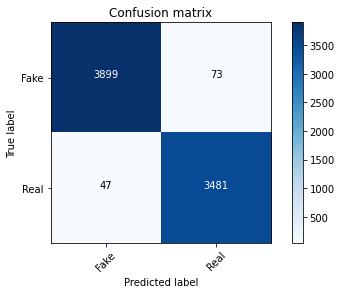

In [40]:
cm = metrics.confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [41]:
y_pred_train = lr.predict(training_data)
#  Accuracy report of train sets compared
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9155
           1       0.99      0.99      0.99      8345

    accuracy                           0.99     17500
   macro avg       0.99      0.99      0.99     17500
weighted avg       0.99      0.99      0.99     17500



Confusion matrix, without normalization


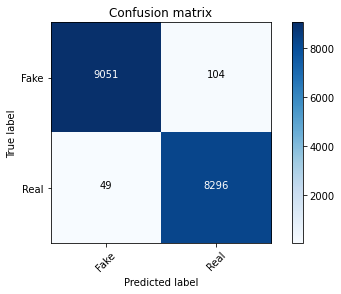

In [42]:
cm = metrics.confusion_matrix(Y_train,y_pred_train)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Prediction considering sample input

In [43]:
sample = lr.predict(vectorizer.transform(df_false.iloc[:1,1]).toarray())
if sample==1:
  print("True")
else:
    print("Fake")

Fake
